# 분석 보고서: 운동 빈도와 BMI 간의 관계 분석

## 1. 연구 목적
본 연구는 학생 건강 검진 데이터에서 중학생, 고등학생이 **하루 30분 이상 운동 빈도**와 **BMI(체질량지수)** 간의 관계를 탐구하기 위해 수행되었습니다. 연구의 주요 목적은 **운동 빈도에 따라 BMI가 유의미하게 달라지는지**를 분석하고, 그룹 간의 차이를 비교하는 것

---

## 2. 데이터 설명
- **데이터셋**: 2022년 학생 건강 검진 데이터
- **총 데이터 크기**: 53,038개의 유효 데이터(결측치 제거 후)
- **주요 변수**:
  - **하루30분이상운동**: 안 함, 일주일에 1-2일(가끔 함), 일주일에 3-4일(자주 함), 5일 이상(매일 함)
  - **BMI**: 학생들의 체질량지수

---

## 3. 데이터 전처리
### (a) 결측치 처리
- `'BMI'`와 `'하루30분이상운동'` 열에서 결측치를 제거.
- 제거 후 총 **53,038개의 데이터**가 남음.

### (b) 남자 여자 데이터 분리

---

## 4. 데이터 분석
### (a) 그룹별 BMI 평균
- 각 운동 빈도 그룹의 BMI 평균:
  - **운동 그룹 1**: 21.56
  - **운동 그룹 2**: 22.05
  - **운동 그룹 3**: 22.28
  - **운동 그룹 4**: 22.34
- **평균적으로 운동 빈도가 높을수록 BMI가 증가**하는 경향을 확인.

### (b) 시각화
#### 박스플롯:
- 전체 데이터를 남자 여자 별로 나누어서 시각화 
- **운동 빈도가 증가할수록 BMI 중앙값이 약간 증가**하는 경향을 관찰.



In [15]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# 데이터 파일 경로
file_path = '../../data/school_health_preprocessed.csv'

# 데이터 읽기

try:
    data = pd.read_csv(file_path, encoding='utf-8')
    print("데이터 로드 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 경로를 확인하세요.")

# 데이터의 첫 5행 출력
print(data.head())

# 데이터 정보 확인
print("\n데이터 정보:")
print(data.info())

# 결측치 개수 확인
print("\n결측치 확인:")
print(data.isnull().sum())


데이터 로드 성공!
    학년도       최종가중치  학교ID    도시규모  공학여부  시도 학교급  학년  반  순번  ... 흡연음주전문가상담희망  \
0  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   1  ...         NaN   
1  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   2  ...         NaN   
2  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   3  ...         NaN   
3  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   4  ...         NaN   
4  2023  223.688275     5  대/중소도시  남여공학  서울   초   1  1   5  ...         NaN   

  무기력감 수업태도교정  과잉행동  주의력산만 성문제전문가상담희망  진로고민  상담요청    키_m        BMI  
0  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.107  15.667728  
1  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.125  15.644444  
2  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.253  15.159148  
3  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.161  22.701628  
4  2.0    2.0   2.0    2.0        NaN   NaN   2.0  1.194  14.870556  

[5 rows x 111 columns]

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84871 entri

In [4]:
# 모든 열 이름 확인
print("Column Names:")
print(data.columns)

# 각 열의 결측치 개수 확인
print("\n결측치 수 :")
print(data.isnull().sum())

print("\n결측치 in '하루30이상운동':")
print(data['하루30분이상운동'].isnull().sum())

Column Names:
Index(['학년도', '최종가중치', '학교ID', '도시규모', '공학여부', '시도', '학교급', '학년', '반', '순번',
       ...
       '흡연음주전문가상담희망', '무기력감', '수업태도교정', '과잉행동', '주의력산만', '성문제전문가상담희망', '진로고민',
       '상담요청', '키_m', 'BMI'],
      dtype='object', length=111)

결측치 수 :
학년도               0
최종가중치             0
학교ID              0
도시규모              0
공학여부              0
              ...  
성문제전문가상담희망    35146
진로고민          35129
상담요청           2468
키_m               0
BMI               0
Length: 111, dtype: int64

결측치 in '하루30이상운동':
35081


In [5]:
# BMI와 '하루30분이상운동' 열 결측치 확인
print(data[['하루30분이상운동']].isnull().sum())

# 결측치 제거
cleaned_data = data.dropna(subset=['BMI', '하루30분이상운동'])
print(f"Cleaned data size: {cleaned_data.shape}")

하루30분이상운동    35081
dtype: int64
Cleaned data size: (49790, 111)


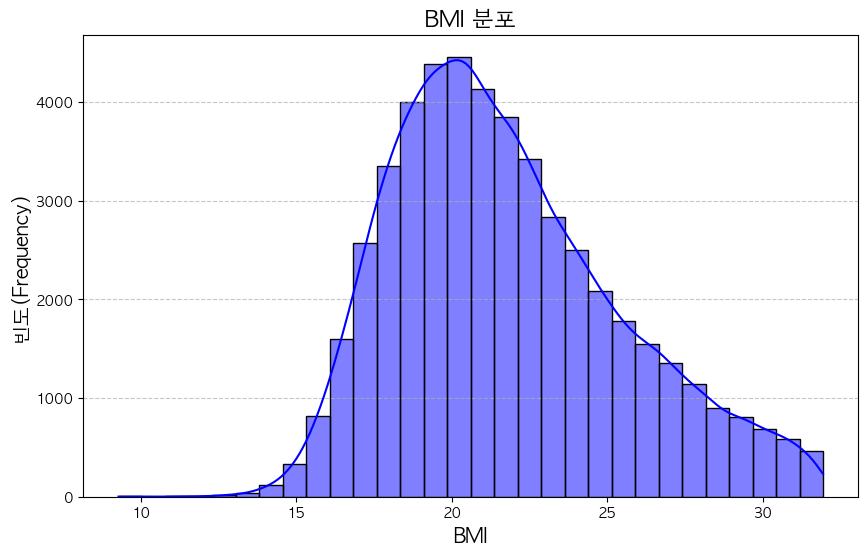

/var/folders/qz/d378mfsj25g7bb288v8ls9yw0000gn/T/ipykernel_87207/3474187108.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cleaned_data, x='하루30분이상운동', palette='coolwarm')


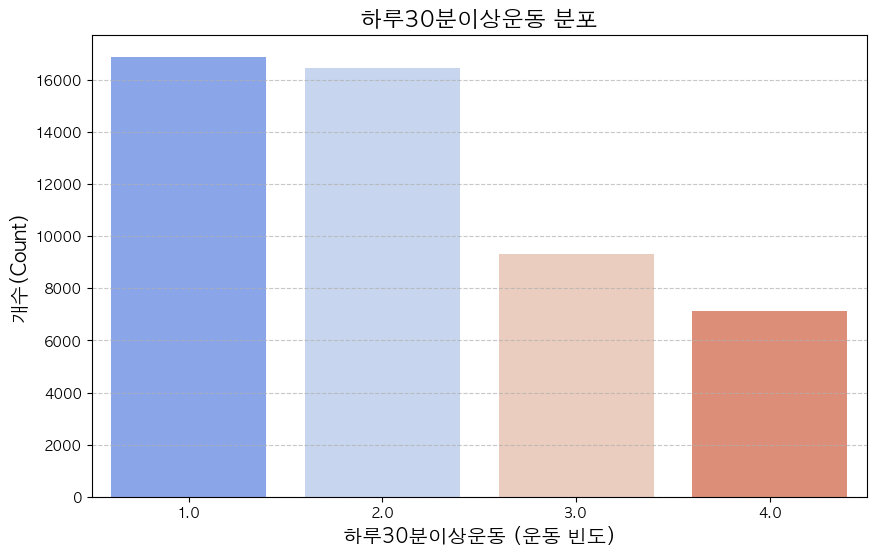

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('font', family='AppleGothic')  
plt.rcParams['axes.unicode_minus'] = False 

# BMI 분포 시각화
# histogram으로 bmi의 전체 데이터 확인 
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['BMI'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('BMI 분포', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('빈도(Frequency)', fontsize=14)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 하루30분이상운동 분포 시각화
# 범주형 데이터여서 각 그룹에 따른 bar plot으로 분포확인
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='하루30분이상운동', palette='coolwarm')
plt.title('하루30분이상운동 분포', fontsize=16)
plt.xlabel('하루30분이상운동 (운동 빈도)', fontsize=14)
plt.ylabel('개수(Count)', fontsize=14) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [7]:
# '하루30분이상운동' 값 분포 확인
print(cleaned_data['하루30분이상운동'].value_counts())

# 그룹별 BMI 평균
grouped_bmi = cleaned_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n하루30분이상운동 여부별 BMI 평균:")
print(grouped_bmi)

하루30분이상운동
1.0    16889
2.0    16440
3.0     9324
4.0     7137
Name: count, dtype: int64

하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.363418
2.0    21.894675
3.0    22.090982
4.0    21.989382
Name: BMI, dtype: float64


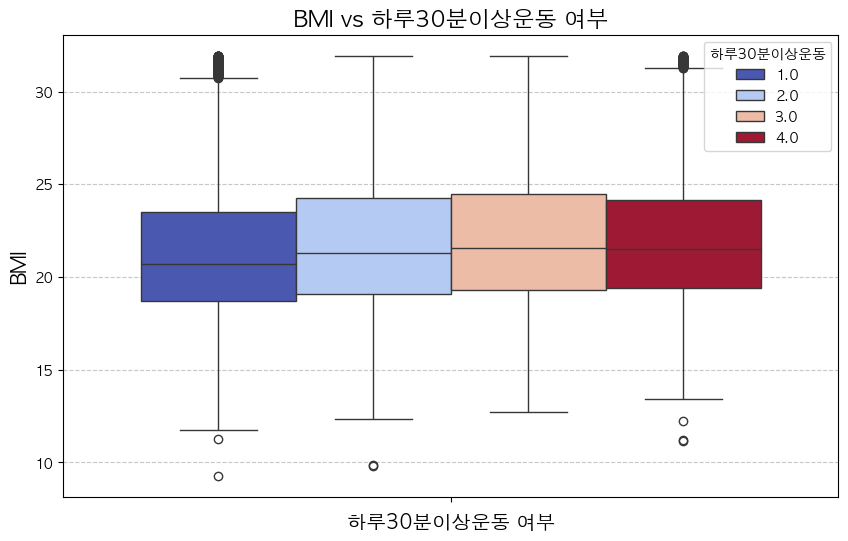

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data, hue='하루30분이상운동', y='BMI', palette='coolwarm')
plt.title('BMI vs 하루30분이상운동 여부', fontsize=16)
plt.xlabel('하루30분이상운동 여부', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 여자보다 남자의 BMI가 평균적으로 더 높게 나타나는 경향이 있어, 분석의 정확성을 높이기 위해 성별에 따른 BMI의 차이를 분리하여 분석을 진행하였습니다. 

In [8]:
# 성별로 데이터 분리
male_data = cleaned_data[cleaned_data['성별'] == '남']
female_data = cleaned_data[cleaned_data['성별'] == '여']

# 전체 데이터: '하루30분이상운동' 값 분포 및 BMI 평균
print("\n[전체 데이터] '하루30분이상운동' 값 분포:")
print(cleaned_data['하루30분이상운동'].value_counts())

grouped_bmi = cleaned_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[전체 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(grouped_bmi)

# 남학생 데이터
print("\n[남학생 데이터] '하루30분이상운동' 값 분포:")
print(male_data['하루30분이상운동'].value_counts())

male_grouped_bmi = male_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[남학생 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(male_grouped_bmi)

# 여학생 데이터
print("\n[여학생 데이터] '하루30분이상운동' 값 분포:")
print(female_data['하루30분이상운동'].value_counts())

female_grouped_bmi = female_data.groupby('하루30분이상운동')['BMI'].mean()
print("\n[여학생 데이터] 하루30분이상운동 여부별 BMI 평균:")
print(female_grouped_bmi)



[전체 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    16889
2.0    16440
3.0     9324
4.0     7137
Name: count, dtype: int64

[전체 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    21.363418
2.0    21.894675
3.0    22.090982
4.0    21.989382
Name: BMI, dtype: float64

[남학생 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
2.0    7743
3.0    6001
1.0    5976
4.0    5313
Name: count, dtype: int64

[남학생 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    22.141190
2.0    22.406306
3.0    22.423198
4.0    22.215805
Name: BMI, dtype: float64

[여학생 데이터] '하루30분이상운동' 값 분포:
하루30분이상운동
1.0    10913
2.0     8697
3.0     3323
4.0     1824
Name: count, dtype: int64

[여학생 데이터] 하루30분이상운동 여부별 BMI 평균:
하루30분이상운동
1.0    20.937507
2.0    21.439167
3.0    21.491035
4.0    21.329850
Name: BMI, dtype: float64


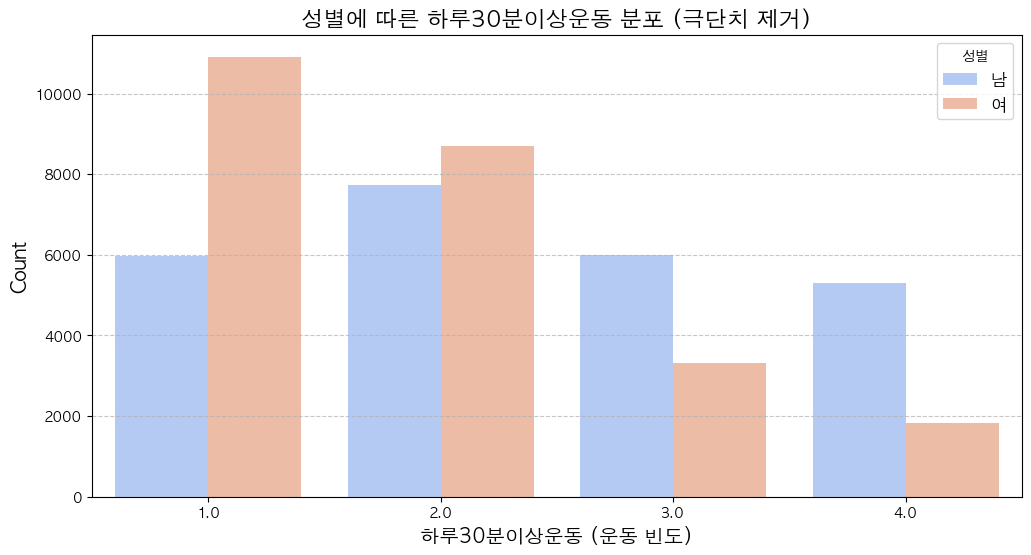

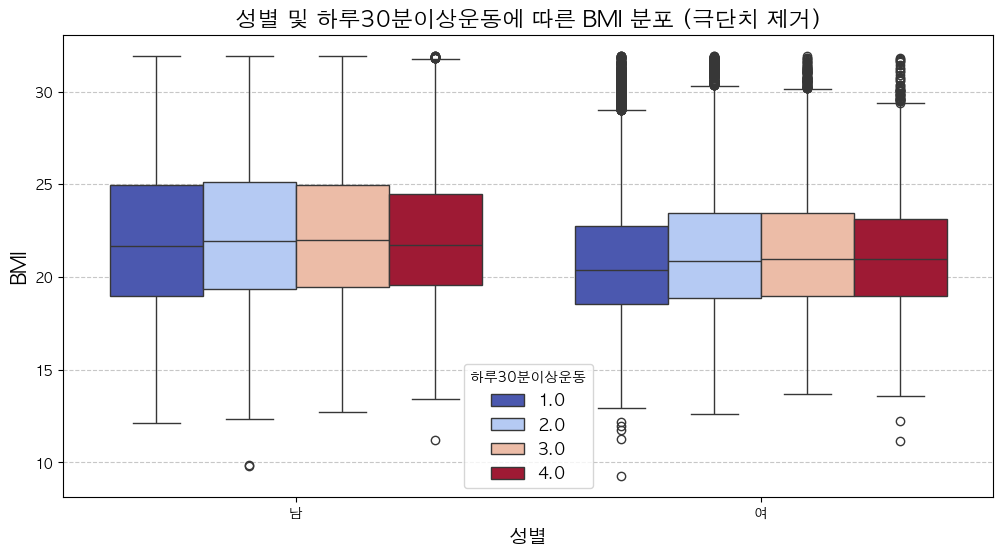

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


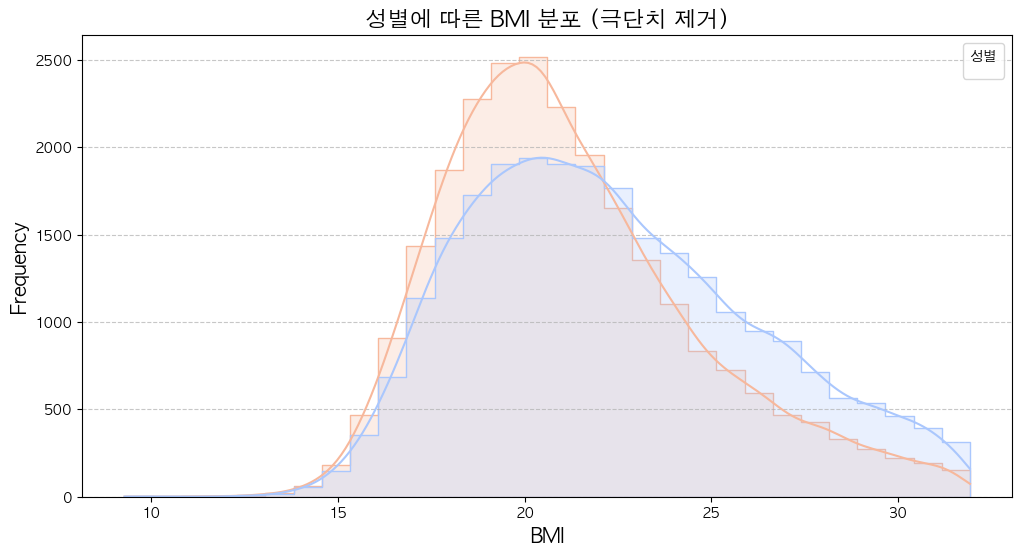

In [9]:
# 박스플롯과 히스토그램으로 분포 차이를 시각적으로 확인합니다
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False



# 남학생과 여학생 데이터를 합침
filtered_data_no_outliers = pd.concat([male_data, female_data])

# 1. 성별에 따른 '하루30분이상운동' 값 분포 시각화
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data_no_outliers, x='하루30분이상운동', hue='성별', palette='coolwarm')
plt.title('성별에 따른 하루30분이상운동 분포 (극단치 제거)', fontsize=16)
plt.xlabel('하루30분이상운동 (운동 빈도)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='성별', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. 성별에 따른 BMI 분포 시각화 (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data_no_outliers, x='성별', y='BMI', hue='하루30분이상운동', palette='coolwarm')
plt.title('성별 및 하루30분이상운동에 따른 BMI 분포 (극단치 제거)', fontsize=16)
plt.xlabel('성별', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='하루30분이상운동', fontsize=12)
plt.show()

# 3. 성별에 따른 BMI 히스토그램
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data_no_outliers, x='BMI', hue='성별', kde=True, bins=30, palette='coolwarm', element='step')
plt.title('성별에 따른 BMI 분포 (극단치 제거)', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='성별', fontsize=12)
plt.show()


여학생의 경우 운동 빈도가 증가할수록 참여 비율이 낮아지는 경향이 뚜렷하며, 이는 남학생보다 두드러졌습니다.

남학생은 "매일 함"(4번 그룹)의 비율이 여학생보다 상대적으로 높게 나타났습니다.

남학생과 여학생 모두에서 운동 빈도가 증가할수록 BMI 중앙값이 소폭 상승하는 경향을 보였습니다.

남학생의 경우 BMI 중앙값과 상위 분포(75퍼센트 이상) 간 변동이 크지 않은 반면, 여학생은 "거의 안 함"(1번 그룹)에서 BMI의 변동 폭이 가장 큽니다.

남학생의 BMI 분포는 여학생에 비해 평균적으로 오른쪽으로 약간 치우친(높은 BMI) 분포를 보였습니다.


---
##### 초기 데이터 분석 결과, 남학생과 여학생 간의 BMI와 운동 빈도의 분포가 다르게 나타났습니다. 
##### 이는 성별에 따라 BMI와 운동 빈도 사이의 관계가 달라질 가능성이 있을 수 있습니다. 성별에 따른 차이를 확인하기 위해 남학생과 여학생을 각각 독립적으로 분석합니다.